In [1]:
# Function for generating histogram
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import datetime 
import import_ipynb
import histplot

importing Jupyter notebook from histplot.ipynb


In [2]:
ASC = '__ASC_ASCIIIn.mrk'
direct = 'C:/Users/tyron/Documents/Geoscience/weather/'

In [3]:
Winter18_1 = histplot.getData(17,direct, ASC, 335, 31, 6, float)
Winter18_2 = histplot.getData(18, direct, ASC, 1, 59, 6, float)
Spring18 = histplot.getData(18,direct, ASC, 60, 92,6, float)
Summer18 = histplot.getData(18, direct, ASC, 152, 92, 6 , float)
Fall18 = histplot.getData(18, direct, ASC, 244, 91, 6, float)

In [4]:
Winter18 = np.concatenate([Winter18_1, Winter18_2])


In [5]:
print(Winter18.shape)
print(Spring18.shape)
print(Summer18.shape)
print(Fall18.shape)
Season18 = np.concatenate([Winter18, Spring18, Summer18, Fall18])

(129600,)
(132476,)
(132477,)
(131036,)


In [6]:
Wprecip18, Wnonprecip18, Wpreciptotal18, Wtotalprep18 = histplot.preciphist(Winter18, len(Winter18), 5000, 1, 1)
Sp_precip18, Sp_nonprecip18, Sp_preciptotal18, Sp_totalprep18 = histplot.preciphist(Spring18, len(Spring18), 5000, 1, 1)
Su_precip18, Su_nonprecip18, Su_preciptotal18, Su_totalprep18 = histplot.preciphist(Summer18, len(Summer18), 5000, 1, 1)
Fprecip18, Fnonprecip18, Fpreciptotal18, Ftotalprep18 = histplot.preciphist(Fall18, len(Fall18), 5000, 1, 1)

In [9]:
precip18, nonprecip18, preciptotal18, totalprep18 = histplot.preciphist(Season18, len(Season18), 20000, 1, 1)
precip18 = precip18[precip18> 0]
nonprecip18 = nonprecip18[nonprecip18 > 0]
preciptotal18 = preciptotal18[preciptotal18 > 0]
perc18_100 = np.zeros(51)
for i in range(0, 51):
    perc18_100[i] =np.percentile(precip18, i*2)
print(perc18_100)
perc18_98 = perc18_100[:50]
print(perc18_98)

[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   2.   2.   2.   2.   2.   2.   3.   3.   3.   4.   5.
   5.   6.   7.   9.  11.  16.  22.  38. 433.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.
  2.  3.  3.  3.  4.  5.  5.  6.  7.  9. 11. 16. 22. 38.]


In [12]:
Wprecip18 = Wprecip18[Wprecip18 > 0]
Sp_precip18 = Sp_precip18[Sp_precip18 > 0]
Su_precip18 = Su_precip18[Su_precip18 > 0]
Fprecip18 = Fprecip18[Fprecip18 > 0]

print(len(Wprecip18))
print(len(Sp_precip18))
print(len(Su_precip18))
print(len(Fprecip18))

1028
943
684
1046


In [14]:
one_bin18_100 = np.unique(perc18_100)
one_bin18_98 = np.unique(perc18_98)
stop1 = np.array([1])
one_bin18_100 = np.setdiff1d(one_bin18_100, stop1)
one_bin18_98 = np.setdiff1d(one_bin18_98, stop1)
print(one_bin18_100)
print(one_bin18_98)
hist18_100, bin18_edge100 = np.histogram(precip18, bins = one_bin18_100)
hist18_98, bin18_edge98 = np.histogram(precip18, bins = one_bin18_98)
print(hist18_100)
print(hist18_98)

[  2.   3.   4.   5.   6.   7.   9.  11.  16.  22.  38. 433.]
[ 2.  3.  4.  5.  6.  7.  9. 11. 16. 22. 38.]
[431 227 135 115  70 101  71  89  75  74  78]
[431 227 135 115  70 101  71  89  75  79]


In [37]:
curve18_100, bin18_val_100 = histplot.calc(precip18, one_bin18_100)
print(curve18_100)
print(bin_val_100)

[ -0.28073561 214.38102646]
[  2.5   3.5   4.5   5.5   6.5   8.   10.   13.5  19.   30.  235.5]


In [19]:
curve18_98, bin18_val_98 = histplot.calc(precip18, one_bin18_98)
print(curve18_98)
print(bin18_val_98)

[ -0.59569002 391.60175432]
[ 2.5  3.5  4.5  5.5  6.5  8.  10.  13.5 19.  30. ]


In [32]:
#Here is where start calculating standard error. 
def r2_calc(y, y_predicted):
    ymean = np.mean(y)
    y_resid = (y - y_predicted)
    y_diff = y - ymean
    print(np.sum(y_resid**2))
    print(np.sum(y_diff**2))
    R2 = 1 - (np.sum(y_resid**2))/(np.sum(y_diff**2))
    return R2

In [40]:
print(np.diff(bin18_edge100))

[  1.   1.   1.   1.   1.   2.   2.   5.   6.  16. 395.]


In [55]:
hist18_100_predict =curve18_100[1]*np.exp(curve18_100[0]*np.log(bin18_val_100))
print(hist18_100_predict)

[165.75644155 150.81587962 140.54206558 132.84345873 126.75719454
 119.57952589 112.31835535 103.24318777  93.79823649  82.50985214
  46.26835184]


In [53]:
hist18_98_predict =curve18_98[1]*np.exp(curve18_98[0]*np.log(bin18_val_98))
print(hist18_98_predict)

[226.8797508  185.67298685 159.85729229 141.84628386 128.41041632
 113.47049127  99.34696575  83.08374844  67.78035966  51.63429327]


In [57]:
R2_18_100_reg = r2_calc(hist18_100, hist18_100_predict)
print(R2_18_100_reg)

83416.61058338685
118610.18181818184
0.2967162742296727


In [58]:
R2_18_98_reg = r2_calc(hist18_98, hist18_98_predict)
print(R2_18_98_reg)

49918.45358449673
114624.09999999999
0.5645029833647834


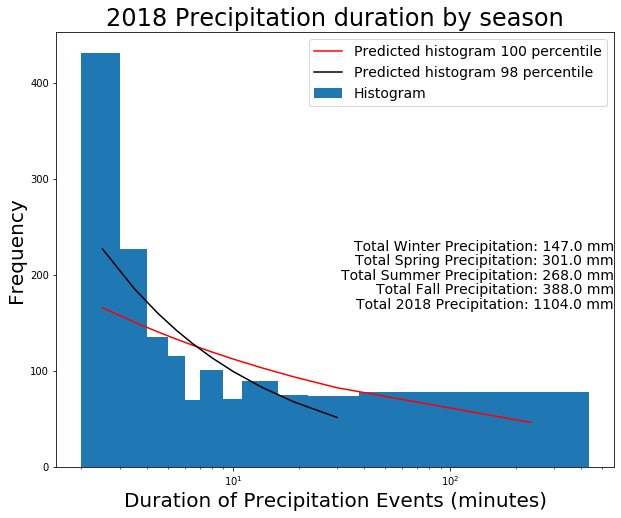

In [56]:
plt.figure(figsize = (10,8))
plt.bar(bin18_val_100, hist18_100, np.diff(bin18_edge100))
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
#plt.ylim(0,2500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2018 Precipitation duration by season', fontsize = 24)
plt.figtext(0.9, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep18)) + ' mm', fontsize = 14, ha='right')
plt.figtext(0.9, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep18)) + ' mm', fontsize = 14, ha='right')
plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep18)) + ' mm', fontsize = 14, ha='right')
plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep18)) + ' mm', fontsize = 14, ha='right')
plt.figtext(0.9, 0.4, 'Total 2018 Precipitation: ' + str(round(totalprep18)) + ' mm', fontsize = 14,ha='right')
plt.plot(bin18_val_100, hist18_100_predict, color = 'r')
plt.plot(bin18_val_98, hist18_98_predict, color = 'k')
plt.legend(labels = [ 'Predicted histogram 100 percentile', 'Predicted histogram 98 percentile', 'Histogram'], fontsize = 14)
#plt.plot(bin18_val_98, )
#plt.plot(bin_val, test*y, color = 'k' )
#plt.legend(labels = ['$y = 214 e^{-0.28x}$', 'Winter', 'Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [22]:
Summer17 = histplot.getData(18, direct, ASC, 197, 47, 6 , float)
Fall17 = histplot.getData(18, direct, ASC, 244, 91, 6, float)

In [23]:
Season17 = np.concatenate([Summer17, Fall17])

In [24]:
Su_precip17, Su_nonprecip17, Su_preciptotal17, Su_totalprep17 = histplot.preciphist(Summer17, len(Summer17), 5000, 1, 1)
Fprecip17, Fnonprecip17, Fpreciptotal17, Ftotalprep17 = histplot.preciphist(Fall17, len(Fall17), 5000, 1, 1)

In [25]:
precip17, nonprecip17, preciptotal17, totalprep17 = histplot.preciphist(Season17, len(Season17), 20000, 1, 1)
countAll = 0
for i in range(0,20000):
    hold = precip17[i]
    if hold > 0:
        countAll += 1
perc = np.zeros(51)
for i in range(0, 51):
    perc[i] =np.percentile(precip17[:countAll], i*2)
print(perc)

[  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
   1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
   1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
   2.     2.     2.     2.     2.     2.     3.     3.     3.     4.
   4.     5.     5.     7.     8.    10.    14.    19.    27.    39.36
 433.  ]


In [26]:
count = 0
count1 = 0
for i in range(0,5000):
    hold2 = Su_precip17[i]
    hold3 = Fprecip17[i]
    if hold2 > 0:
        count += 1
    if hold3 > 0:
        count1 += 1
print(count)
print(count1)

396
1046


In [27]:
one_bin = np.unique(perc)
stop1 = np.array([1])
one_bin = np.setdiff1d(one_bin, stop1)
hist17, bin_edge = np.histogram(precip17, bins = one_bin)

In [28]:
log_x = np.log(one_bin)
log_y = np.log(hist17)
log_x_2 = np.log(bin_edge[:12])
bin_val = np.zeros(11)
for i in range(0, 11):
    bin_val[i] = (one_bin[i]+one_bin[i+1])/2
print(bin_val)
logx = np.log(bin_val)
print(log_y)
curve_fit = np.polyfit(logx, log_y, 1)
print(curve_fit)

[  2.5    3.5    4.5    6.     7.5    9.    12.    16.5   23.    33.18
 236.18]
[5.20400669 4.51085951 3.8918203  4.35670883 2.99573227 3.4657359
 3.4339872  3.4339872  3.29583687 3.49650756 3.36729583]
[-0.31758919  4.54988789]


In [31]:
test = np.exp(curve_fit[1])
y = np.exp(curve_fit[0]*logx)
print(test)

94.62179963189587


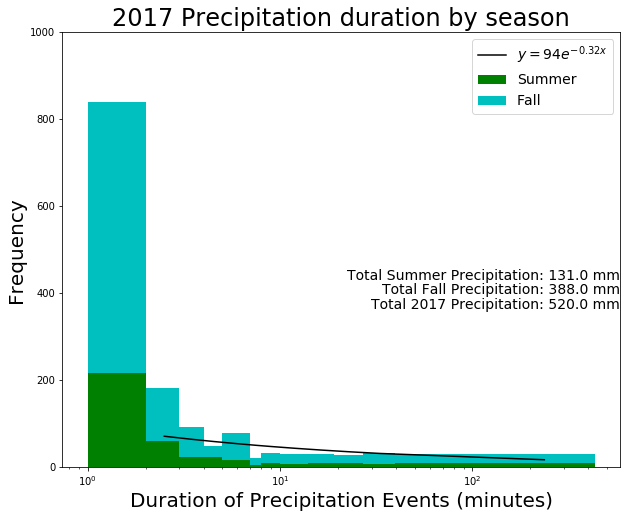

In [32]:
plt.figure(figsize = (10,8))
plt.hist([ Su_precip17,Fprecip17], bins =perc, range= (perc.min,perc.max), color = ['g','c'], stacked =True)
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
plt.ylim(0,1000)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2017 Precipitation duration by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
plt.plot(bin_val, test*y, color = 'k' )
plt.legend(labels = ['$y = 94 e^{-0.32x}$', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [41]:
print(test)

169.06296044233164


In [33]:
Winter20_1 = histplot.getData(19,direct, ASC, 335, 31, 6, float)
Winter20_2 = histplot.getData(20, direct, ASC, 1, 60, 6, float)
Spring20 = histplot.getData(20,direct, ASC, 61, 92,6, float)
Summer20 = histplot.getData(20, direct, ASC, 153, 92, 6 , float)
Fall20 = histplot.getData(20, direct, ASC, 245, 69, 6, float)

In [34]:
Winter20 = np.concatenate([Winter20_1, Winter20_2])


In [35]:
print(Winter20.shape)
print(Spring20.shape)
print(Summer20.shape)
print(Fall20.shape)
Season20 = np.concatenate([Winter20, Spring20, Summer20, Fall20])

(131040,)
(132476,)
(132464,)
(99356,)


In [36]:
Wprecip20, Wnonprecip20, Wpreciptotal20, Wtotalprep20 = histplot.preciphist(Winter20, len(Winter20), 5000, 1, 1)
Sp_precip20, Sp_nonprecip20, Sp_preciptotal20, Sp_totalprep20 = histplot.preciphist(Spring20, len(Spring20), 5000, 1, 1)
Su_precip20, Su_nonprecip20, Su_preciptotal20, Su_totalprep20 = histplot.preciphist(Summer20, len(Summer20), 5000, 1, 1)
Fprecip20, Fnonprecip20, Fpreciptotal20, Ftotalprep20 = histplot.preciphist(Fall20, len(Fall20), 5000, 1, 1)

In [117]:
precip20, nonprecip20, preciptotal20, totalprep20 = histplot.preciphist(Season20, len(Season20), 20000, 1, 1)
countAll = 0
for i in range(0,20000):
    hold = precip20[i]
    if hold > 0:
        countAll += 1
perc = np.zeros(51)
for i in range(0, 51):
    perc[i] =np.percentile(precip20[:countAll], i*2)
print(perc)

[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   2.   2.   2.   2.   2.   2.   3.   3.   3.   4.   4.
   5.   6.   6.   8.  10.  13.  19.  42. 268.]


In [38]:
count = 0
count1 = 0
count2 = 0
count3 = 0
for i in range(0,5000):
    hold = Wprecip20[i]
    hold1 = Sp_precip20[i]
    hold2 = Su_precip20[i]
    hold3 = Fprecip20[i]
    if hold > 0:
        count += 1
    if hold1 > 0:
        count1 += 1
    if hold2 > 0:
        count2 += 1
    if hold3 > 0:
        count3 += 1
print(count)
print(count1)
print(count2)
print(count3)

1254
1000
469
454


In [39]:
Wprecip20 = Wprecip20[:count]
Sp_precip20 = Sp_precip20[:count1]
Su_precip20 = Su_precip20[:count2]
Fprecip20 = Fprecip20[:count3]

In [40]:
one_bin = np.unique(perc)
stop1 = np.array([1])
one_bin = np.setdiff1d(one_bin, stop1)
hist20, bin_edge = np.histogram(precip20, bins = one_bin)


In [105]:
print(hist20)

[400 196 136  88 111  58  81  66  66  65]


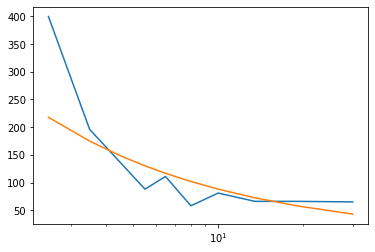

In [112]:
plt.plot(bin_val, hist20)
plt.xscale('log')
#plt.yscale('log')
plt.plot(bin_val, y*test)

In [107]:
log_x = np.log(one_bin)
log_y = np.log(hist20)
log_x_2 = np.log(bin_edge[:12])
bin_val = np.zeros(10)
for i in range(0,10):
    bin_val[i] = (one_bin[i]+one_bin[i+1])/2
print(bin_val)
logx = np.log(bin_val)
print(log_y)
curve_fit = np.polyfit(logx, log_y, 1)
print(curve_fit)

[ 2.5  3.5  4.5  5.5  6.5  8.  10.  13.5 19.  30. ]
[5.99146455 5.27811466 4.91265489 4.47733681 4.7095302  4.06044301
 4.39444915 4.18965474 4.18965474 4.17438727]
[-0.6534295   5.98252913]


In [118]:
print(perc)

[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   2.   2.   2.   2.   2.   2.   3.   3.   3.   4.   4.
   5.   6.   6.   8.  10.  13.  19.  42. 268.]


In [108]:
test = np.exp(curve_fit[1])
y = np.exp(curve_fit[0]*logx)
print(test)
print(y)

396.4417537832426
[0.54950831 0.4410521  0.3742585  0.32826545 0.29431909 0.25697707
 0.22211122 0.1825604  0.14602415 0.10834413]


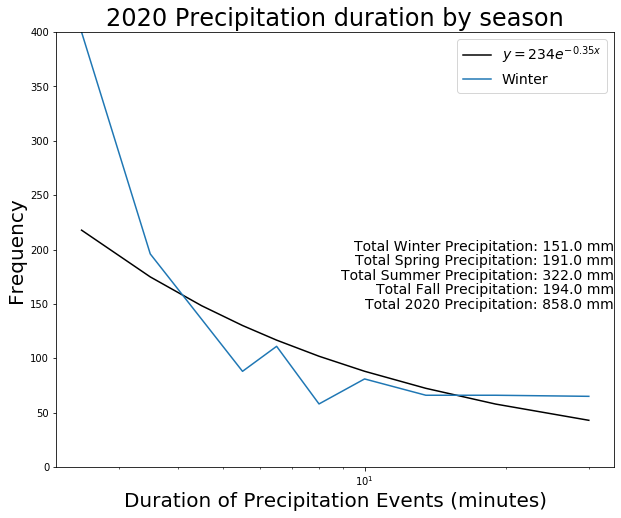

In [124]:
plt.figure(figsize = (10,8))
#plt.hist([Wprecip20, Sp_precip20, Su_precip20,Fprecip20], bins =perc, range= (perc.min,perc.max), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
plt.ylim(0,400)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2020 Precipitation duration by season', fontsize = 24)
plt.figtext(0.9, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep20)) + ' mm', fontsize = 14,ha='right')
plt.figtext(0.9, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep20)) + ' mm', fontsize = 14, ha='right')
plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep20)) + ' mm', fontsize = 14, ha='right')
plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep20)) + ' mm', fontsize = 14,ha='right')
plt.figtext(0.9, 0.4, 'Total 2020 Precipitation: ' + str(round(totalprep20)) + ' mm', fontsize = 14,ha='right')

plt.plot(bin_val, test*y, color = 'k' )
plt.plot(bin_val, hist20)
plt.legend(labels = ['$y = 234 e^{-0.35x}$', 'Winter', 'Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [44]:
Winter19_1 = histplot.getData(18,direct, ASC, 335, 31, 6, float)
Winter19_2 = histplot.getData(19, direct, ASC, 1, 59, 6, float)
Spring19 = histplot.getData(19,direct, ASC, 60, 92,6, float)
Summer19 = histplot.getData(19, direct, ASC, 152, 92, 6 , float)
Fall19 = histplot.getData(19, direct, ASC, 244, 91, 6, float)

In [45]:
Winter19 = np.concatenate([Winter19_1, Winter19_2])

In [46]:
Season19 = np.concatenate([Winter19, Spring19, Summer19, Fall19])

In [47]:
Wprecip19, Wnonprecip19, Wpreciptotal19, Wtotalprep19 = histplot.preciphist(Winter19, len(Winter19), 5000, 1, 1)
Sp_precip19, Sp_nonprecip19, Sp_preciptotal19, Sp_totalprep19 = histplot.preciphist(Spring19, len(Spring19), 5000, 1, 1)
Su_precip19, Su_nonprecip19, Su_preciptotal19, Su_totalprep19 = histplot.preciphist(Summer19, len(Summer19), 5000, 1, 1)
Fprecip19, Fnonprecip19, Fpreciptotal19, Ftotalprep19 = histplot.preciphist(Fall19, len(Fall19), 5000, 1, 1)

In [48]:
precip19, nonprecip19, preciptotal19, totalprep19 = histplot.preciphist(Season19, len(Season19), 20000, 1, 1)
countAll = 0
for i in range(0,20000):
    hold = precip19[i]
    if hold > 0:
        countAll += 1
perc19 = np.zeros(51)
for i in range(0, 51):
    perc19[i] =np.percentile(precip19[:countAll], i*2)
print(perc19)

[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   2.   2.   2.   2.   2.   3.   3.   3.   4.   4.   5.   5.
   6.   7.   9.  11.  13.  18.  25.  42. 368.]


In [49]:
count = 0
count1 = 0
count2 = 0
count3 = 0
for i in range(0,5000):
    hold = Wprecip19[i]
    hold1 = Sp_precip19[i]
    hold2 = Su_precip19[i]
    hold3 = Fprecip19[i]
    if hold > 0:
        count += 1
    if hold1 > 0:
        count1 += 1
    if hold2 > 0:
        count2 += 1
    if hold3 > 0:
        count3 += 1
print(count)
print(count1)
print(count2)
print(count3)

1094
1061
445
598


In [50]:
Wprecip19 = Wprecip19[:count]
Sp_precip19 = Sp_precip19[:count1]
Su_precip19 = Su_precip19[:count2]
Fprecip19 = Fprecip19[:count3]

In [51]:
one_bin = np.unique(perc)
stop1 = np.array([1])
one_bin = np.setdiff1d(one_bin, stop1)
hist19, bin_edge = np.histogram(precip19, bins = one_bin)

In [55]:
log_x = np.log(one_bin)
log_y = np.log(hist19)
log_x_2 = np.log(bin_edge[:12])
bin_val = np.zeros(10)
for i in range(0, 10):
    bin_val[i] = (one_bin[i]+one_bin[i+1])/2
print(bin_val)
logx = np.log(bin_val)
print(log_y)
curve_fit = np.polyfit(logx, log_y, 1)
print(curve_fit)

[  2.5   3.5   4.5   5.5   7.    9.   11.5  16.   30.5 155. ]
[5.83481074 5.25749537 4.77068462 4.53259949 4.82831374 4.51085951
 4.40671925 4.53259949 4.73619845 4.15888308]
[-0.28233228  5.41184543]


In [58]:
test19 = np.exp(curve_fit[1])
y19 = np.exp(curve_fit[0]*logx)
print(test19)

224.04466621282003


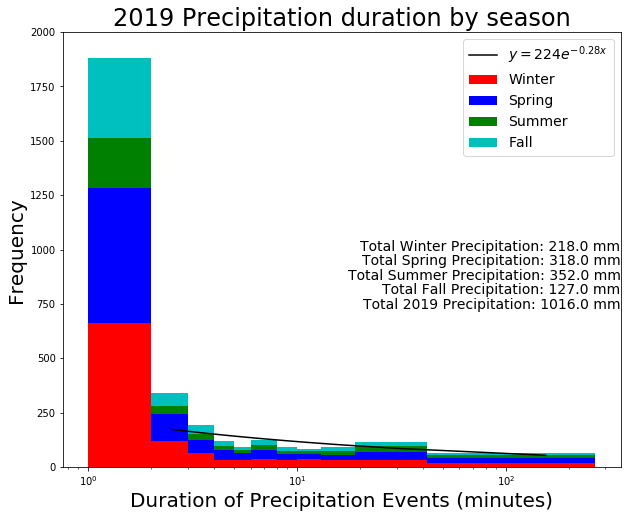

In [59]:

plt.figure(figsize = (10,8))
plt.hist([Wprecip19, Sp_precip19, Su_precip19,Fprecip19], bins =perc, range= (perc19.min,perc19.max), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
plt.ylim(0,2000)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2019 Precipitation duration by season', fontsize = 24)
plt.figtext(0.9, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep19)) + ' mm', fontsize = 14, ha='right')
plt.figtext(0.9, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep19)) + ' mm', fontsize = 14, ha='right')
plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep19)) + ' mm', fontsize = 14, ha='right')
plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep19)) + ' mm', fontsize = 14,ha='right')
plt.figtext(0.9, 0.4, 'Total 2019 Precipitation: ' + str(round(totalprep19)) + ' mm', fontsize = 14,ha='right')
plt.plot(bin_val, test19*y19, color = 'k' )
plt.legend(labels = ['$y = 224 e^{-0.28x}$', 'Winter', 'Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [63]:
Wperc19 = np.unique(perc19)
one = np.array([1])
perc19 = np.setdiff1d(perc19, one)
print(perc19)

[  2.   3.   4.   5.   6.   7.   9.  11.  13.  18.  25.  42. 368.]


In [73]:
Whist19, Wbin_edge19 = np.histogram(Wprecip19, bins = perc19)
print(Wbin_edge19)

[  2.   3.   4.   5.   6.   7.   9.  11.  13.  18.  25.  42. 368.]


In [75]:
log_x = np.log(Wperc19)
log_y = np.log(Whist19)
bin_val = np.zeros(len(perc19)-1)
for i in range(len(perc19)-1):
    bin_val[i] = (Wperc19[i]+Wperc19[i+1])/2
print(bin_val)
logx = np.log(bin_val)
print(Whist19)
curve_fit = np.polyfit(logx, log_y, 1)
print(curve_fit)


[ 1.5  2.5  3.5  4.5  5.5  6.5  8.  10.  12.  15.5 21.5 33.5]
[118  66  31  34  20  33  24  28  29  16  16  19]
[-0.54872666  4.48859358]


In [66]:
def calc(precip_data, what_bin):
    hist, bin_edge = np.histogram(precip_data, bins = what_bin)
    log_y = np.log(hist)
    bin_val = np.zeros(len(what_bin)-1)
    for i in range(len(what_bin)-1):
        bin_val[i] = (what_bin[i] + what_bin[i+1])/2
    logx = np.log(bin_val)
    curve_fit = np.polyfit(logx, log_y,1)
    curve_fit[1] = np.exp(curve_fit[1])
    return curve_fit

In [76]:
Sp_curve_fit = calc(Sp_precip19, Wperc19)
print(Sp_curve_fit)

[ -0.52088703 122.45818198]


In [77]:
print(np.exp(curve_fit[1]))

88.99619199987698


In [69]:
Su_curve_fit19 = calc(Su_precip19, Wperc19)
print(Su_curve_fit19)


[-0.40553413 49.41193243]


In [70]:
Fcurve_fit19 = calc(Fprecip19, Wperc19)
print(Fcurve_fit19)

[-0.55962208 69.12651996]


In [79]:
W_f19 = calc(Wprecip19, perc19)
Sp_f19 = calc(Sp_precip19, perc19)
Su_f19 = calc(Su_precip19, perc19)
F_f19 = calc(Fprecip19, perc19)
print(W_f19)
print(Sp_f19)
print(Su_f19)
print(F_f19)

[-0.34218061 67.92717116]
[-0.28585    59.83352026]
[-0.18635456 25.33809878]
[-0.3160019  32.90354345]


In [71]:
perc20 = one_bin
print(perc20)

[  2.   3.   4.   5.   6.   8.  10.  13.  19.  42. 268.]


In [72]:
W_cf = calc(Wprecip20, perc20)
Sp_cf = calc(Sp_precip20, perc20)
Su_cf = calc(Su_precip20, perc20)
F_cf = calc(Fprecip20, perc20)
print(W_cf)
print(Sp_cf)
print(Su_cf)
print(F_cf)

[ -0.51587648 119.30025908]
[-0.32529406 60.35297715]
[-0.2671361 36.3079918]
[-0.2344435  29.30410359]


In [84]:
perc17 = np.zeros(51)
for i in range(0, 51):
    perc17[i] =np.percentile(precip17[:countAll], i*2)
perc17 = np.unique(perc17)
print(perc17)
second = np.array([0,1])
perc17 = np.setdiff1d(perc17, second)
print(perc17)

[  0.   1.   2.   3.   4.   5.   7.  12.  26. 433.]
[  2.   3.   4.   5.   7.  12.  26. 433.]


In [85]:
#W_cf17 = calc(Wprecip20, perc20)
#Sp_cf = calc(Sp_precip20, perc20)
Su_cf17 = calc(Su_precip17, perc17)
F_cf17 = calc(Fprecip17, perc17)
#print(W_cf)
#print(Sp_cf)
print(Su_cf17)
print(F_cf17)

[-0.14606822 32.41665985]
[-0.09276905 67.74937873]


[  2.   3.   4.   5.   7.  12.  26. 433.]
[  2.   3.   4.   5.   7.  12.  26. 433.]


In [91]:

W_cf18 = calc(Wprecip18, one_bin)
Sp_cf18 = calc(Sp_precip18, one_bin)
Su_cf18 = calc(Su_precip18, one_bin)
F_cf18 = calc(Fprecip18, one_bin)
print(W_cf18)
print(Sp_cf18)
print(Su_cf18)
print(F_cf18)

[-0.37813023 73.52582575]
[-0.27473188 46.16627468]
[-0.23640581 37.83472133]
[-0.2327441  55.17582818]


In [76]:
print(totalprep17)
print(totalprep18)
print(totalprep19)
print(totalprep20)

519.6899999999737
1104.409999999886
1016.3399999998909
858.1799999999121


In [78]:
print(sum(precip18))
print(sum(precip17))
print(sum(precip19))
print(sum(precip20))

18072.0
7598.0
17044.0
15235.0


In [79]:
int17 = totalprep17/sum(precip17)
int18 = totalprep18/sum(precip18)
int19 = totalprep19/sum(precip19)
int20 = totalprep20/sum(precip20)

In [80]:
print(int17)
print(int18)
print(int19)
print(int20)


0.06839826270070724
0.06111166445329161
0.059630368458102025
0.05632950443058169


In [82]:
Su_int17 = Su_totalprep17/sum(Su_precip17)
F_int17 = Ftotalprep17/sum(Fprecip17)
print(Su_int17)
print(F_int17)
print(Su_totalprep17)
print(Ftotalprep17)

0.07127440347071655
0.06747653806047849
131.43000000000131
388.25999999999317


In [83]:
Su_int18 = Su_totalprep18/sum(Su_precip18)
F_int18 = Ftotalprep18/sum(Fprecip18)
Sp_int18 = Sp_totalprep18/sum(Sp_precip18)
W_int18 = Wtotalprep18/sum(Wprecip18)
print(Su_int18)
print(F_int18)
print(Su_totalprep18)
print(Ftotalprep18)
print(Sp_int18)
print(W_int18)
print(Sp_totalprep18)
print(Wtotalprep18)

0.07822585351619402
0.06747653806047849
268.0799999999969
388.25999999999317
0.06652682711415259
0.03364740944520913
301.29999999999706
146.77000000000223


In [85]:
W_int19 = Wtotalprep19/sum(Wprecip19)
Sp_int19 = Sp_totalprep19/sum(Sp_precip19)
Su_int19 = Su_totalprep19/sum(Su_precip19)
F_int19 = Ftotalprep19/sum(Fprecip19)
print(W_int19)
print(Sp_int19)
print(Wtotalprep19)
print(Sp_totalprep19)
print(Su_int19)
print(F_int19)
print(Su_totalprep19)
print(Ftotalprep19)

0.0404611965178736
0.056015487504399254
218.4499999999996
318.27999999999656
0.1110970996216882
0.045578645646722704
352.399999999995
127.21000000000306


In [86]:
W_int20 = Wtotalprep20/sum(Wprecip20)
Sp_int20 = Sp_totalprep20/sum(Sp_precip20)
Su_int20 = Su_totalprep20/sum(Su_precip20)
F_int20 = Ftotalprep20/sum(Fprecip20)
print(W_int20)
print(Sp_int20)
print(Wtotalprep20)
print(Sp_totalprep20)
print(Su_int20)
print(F_int20)
print(Su_totalprep20)
print(Ftotalprep20)

0.0313906735751291
0.042436525612471604
151.4599999999979
190.5399999999975
0.12050187265917418
0.05982769230769262
321.73999999999506
194.44000000000102


In [ ]:
# We should be calculating an r^2 value from the log values of what we are looking at rather than the actual value. 
# We can probably try both to see what the difference is, and if it affects our determination. 